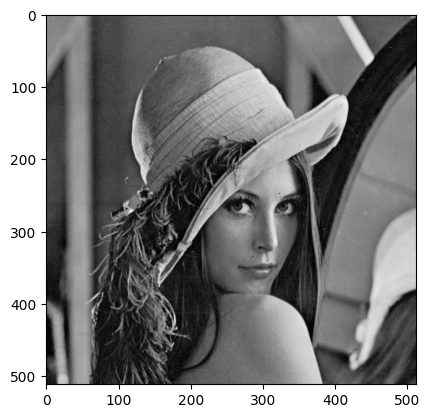

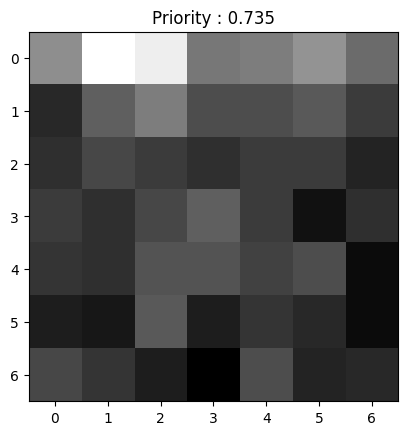

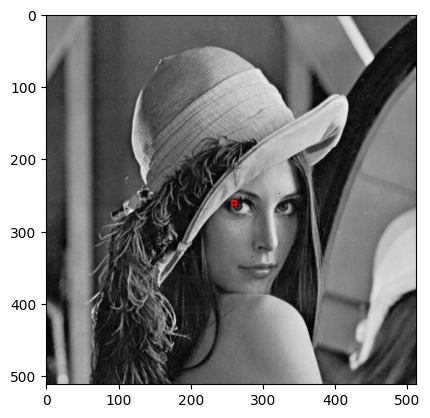

In [12]:
from patchedimage import PatchedImage

imgp = PatchedImage("images/lena.tif",3)

imgp.set_working_patch((260,260))

imgp.set_priorities()

imgp.show_img()

imgp.show_patch()

imgp.show_patch_in_img()